In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Vectorized Operations: Writing Optimized Code

1. Generate a 1000 × 1000 matrix of random integers between 0 (included) and 20 (excluded).
2. Compute the sum of diagonal elements using a for loop.
3. Compute the sum of diagonal elements using a NumPy linear algebra function.
4. Compare the running times of 2. and 3. with %%timeit (the %% syntax allows timing multiple lines).
Hint: use numpy.random.randint.

In [24]:
matrix = np.random.randint(0, 20, size=(1000, 1000))

In [25]:
%%timeit
sum = 0
for i in np.arange(1000):
    sum += matrix[i, i]

127 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
%%timeit
trace = np.trace(matrix)

1.34 µs ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


# Exercise 2: Fibonacci Numbers with Binet Formula

1. Using NumPy, compute the first 20 numbers of the Fibonacci series Fn (n = 1, 2, . . . , 10) with Binet formula

In [27]:
def binet_formula(n):
    return (np.power(1+np.sqrt(5), n) - np.power(1-np.sqrt(5), n))/(2**n*np.sqrt(5))

first_twenty = binet_formula(np.arange(20)+1)
print(first_twenty)

[1.000e+00 1.000e+00 2.000e+00 3.000e+00 5.000e+00 8.000e+00 1.300e+01
 2.100e+01 3.400e+01 5.500e+01 8.900e+01 1.440e+02 2.330e+02 3.770e+02
 6.100e+02 9.870e+02 1.597e+03 2.584e+03 4.181e+03 6.765e+03]


# Exercise 3: Quantum Harmonic Oscillator

In this exercise, you will find the bound states of the 1d quantum harmonic oscillator of mass m by solving the time-independent Schr ̈odinger equation numerically. This equation is an eigenvalue problem
Hψn = Enψn
where H = K + V = − h ̄2 ∂2 + 1 mω2x2 is the Hamiltonian operator, ψ is the wavefunction (eigenfunction),
2m x 2 n and En the energy level (eigenvalue). In the following, set h ̄ = m = ω = 1.
1. Space discretization. Consider the interval [−10, 10] and discretize it generating a mesh of uniform spacing ∆x = 0.01 with N points, i.e., xi = −10 + i∆x (i = 0,1,...,N − 1). In this space, the wavefunction ψ is a vector with components (ψ)i = ψ(xi).
2. Hamiltonian discretization. Using this discretization, the Hamiltonian becomes a N × N matrix. In particular, the kinetic energy term is

()

where we used the finite-difference approximation of the second derivative, and the potential energy
term is

()

Generate the Hamiltonian matrix Hˆ = Kˆ + Vˆ .

3. Diagonalization. Diagonalize Hˆ using numpy.linalg.eig and numpy.linalg.eigh, which is specific for symmetric matrices. Use %%timeit to compare running times. Check that the eigenvalues are sorted in increasing order, and if not, do so.
4. Normalize the wavefunctions (eigenfunctions) of Hˆ computing the normalization constant
Z =
sZ 10 vuN−1
ψ∗(x)ψ(x)dx ≈ ut X ψ∗(xi)ψ(xi)∆x.
−10
i=0
5. Plot the first 10 (normalized) wavefunctions and print the values of the corresponding energy levels (eigenvalues1 ). Compare with the theoretical predictions En = (n + 21 ).
Hint: use numpy.arange, numpy.diag, numpy.argsort, matplotlib.pyplot.plot.


In [11]:
delta_x = 0.01
size = int(20/delta_x) + 1
x_space, step = np.linspace(-10, 10, num=int(20/delta_x)+1, retstep = True)
print(step)
print(x_space)

0.01
[-10.    -9.99  -9.98 ...   9.98   9.99  10.  ]


In [26]:
K = -1/(2*delta_x**2)*(np.diag(-2*np.ones(size))+np.diag(1*np.ones(size-1), k=1)+np.diag(1*np.ones(size-1), k=-1))
print(K)

def V_calc(x):
    return 1/2*x**2

V_vec = V_calc(x_space)
V = 1/2*np.diag(V_vec)
print(V)

H = K + V
print(H)

[[10000. -5000.    -0. ...    -0.    -0.    -0.]
 [-5000. 10000. -5000. ...    -0.    -0.    -0.]
 [   -0. -5000. 10000. ...    -0.    -0.    -0.]
 ...
 [   -0.    -0.    -0. ... 10000. -5000.    -0.]
 [   -0.    -0.    -0. ... -5000. 10000. -5000.]
 [   -0.    -0.    -0. ...    -0. -5000. 10000.]]
[[25.        0.        0.       ...  0.        0.        0.      ]
 [ 0.       24.950025  0.       ...  0.        0.        0.      ]
 [ 0.        0.       24.9001   ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ... 24.9001    0.        0.      ]
 [ 0.        0.        0.       ...  0.       24.950025  0.      ]
 [ 0.        0.        0.       ...  0.        0.       25.      ]]
[[10025.       -5000.           0.       ...     0.           0.
      0.      ]
 [-5000.       10024.950025 -5000.       ...     0.           0.
      0.      ]
 [    0.       -5000.       10024.9001   ...     0.           0.
      0.      ]
 ...
 [    0.           0.           0.       ...

In [27]:
eigenvalues, eigenvectors = np.linalg.eig(H)
print(eigenvalues)

[20019.78223004 20016.06330319 20013.17378806 ...   768.07170486
  1032.99425517   444.97692994]


In [59]:
eigenvalues, eigenvectors = np.linalg.eigh(H)
print(eigenvalues)

[3.53551828e-01 1.06065236e+00 1.76774664e+00 ... 2.00160633e+04
 2.00197822e+04 2.00197822e+04]


In [63]:
# Normalize

def normalize(eigenvectors):
    return np.sqrt(np.sum(np.square(eigenvectors), axis = 0)*delta_x)

print(eigenvectors.shape)
Z = (normalize(eigenvectors)[np.newaxis]).T

(2001, 2001)


In [76]:
## Plot first ten eigenvectors
eigenvec = np.divide(eigenvectors[:, 0:9],Z)
print(np.sum(np.square(eigenvec[:, 6])))
eigenval = eigenvalues[0:9].T[np.newaxis]
print(eigenval.shape)
eigenval = np.divide(eigenval, Z)

100.00000000000004
(1, 9)


In [74]:
print(eigenvec.shape)
print(eigenval.shape)

(2001, 9)
(2001, 9)


In [71]:
for idx, vec in enumerate(eigenvec.T):
    plt.plot(x_space, vec, label = 'Energy = ' + "{:.4f}".format(eigenval[idx]))
    plt.xlabel('x')
    plt.ylabel('psi(x)')
    plt.legend()
    plt.title('eigenvectors SHO')
    plt.show()



SyntaxError: invalid decimal literal (3128753363.py, line 2)

# Exercise 4 - Eigenvalue statistics of random matrices

In this exercise, you will study the distribution of the spectrum of certain random matrices. Random matrix theory is a branch of mathematics with numerous applications in, e.g., physics, machine learning, and finance. The simplest random matrix is the Wigner one


where A is a random matrix of size N with i.i.d. elements distributed from a standard Gaussian, i.e., Aij ∼N(0,1).
1. Generate a Wigner matrix with N = 1000.
2. Find the eigenvalues λn (n = 1, 2, . . . , N ) and sort them in increasing order.
3. Plot the probability density of a single eigenvalue ρW (λ) and compare it to the Wigner semi-circle law

In [30]:
N = 1000
A = np.random.normal(size=(N,N))
wigner = (A + A.T)/np.sqrt(2*N)

In [31]:
evals, evecs = np.linalg.eig(wigner)
evals = np.sort(evals)
evals

array([-1.99733045e+00, -1.97146709e+00, -1.95042784e+00, -1.93740224e+00,
       -1.91593756e+00, -1.90705076e+00, -1.89759903e+00, -1.89004331e+00,
       -1.87628643e+00, -1.86400301e+00, -1.86150303e+00, -1.85460327e+00,
       -1.84198158e+00, -1.83945955e+00, -1.83657350e+00, -1.82451802e+00,
       -1.81591809e+00, -1.81083295e+00, -1.79955397e+00, -1.79707774e+00,
       -1.78936554e+00, -1.78420077e+00, -1.77302517e+00, -1.76738971e+00,
       -1.75837603e+00, -1.75108977e+00, -1.74304052e+00, -1.73905792e+00,
       -1.73725474e+00, -1.73221017e+00, -1.72582017e+00, -1.71481320e+00,
       -1.70714858e+00, -1.70637411e+00, -1.69505315e+00, -1.69262418e+00,
       -1.68362466e+00, -1.67828012e+00, -1.67565939e+00, -1.66483610e+00,
       -1.66206740e+00, -1.66082991e+00, -1.65360901e+00, -1.65074078e+00,
       -1.63277604e+00, -1.62971479e+00, -1.62397354e+00, -1.62132110e+00,
       -1.62085962e+00, -1.61634055e+00, -1.59965752e+00, -1.59543317e+00,
       -1.59453453e+00, -

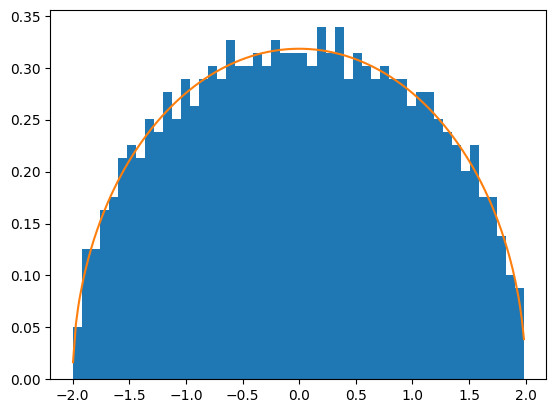

In [32]:
def wigner_semicircle(evals):
    output = np.zeros(len(evals))
    for idx, eval in enumerate(evals):
        if np.abs(eval) < 2:
            output[idx] = np.sqrt(4 - eval**2)/(2*np.pi)
        else:
            output[idx] = 0
    return output

def wigner_semicircle_efficient(evals):
    output = evals
    idxs = np.abs(evals) > 2
    idxs2 = np.abs(evals) <= 2
    evals[idxs] = 0
    evals[idxs2] = np.sqrt(4 - evals**2)/(2*np.pi)
    return output

plt.hist(evals, density=True, bins=50)
plt.plot(evals, wigner_semicircle(evals))